In [1]:
import sys
sys.path.append("../src/")

from neural_pid_controller import NeuralPidController
from bathtub import Bathtub
from cournot import CournotCompetition
from rabbits import Rabbits
from consys import ConSys
from plot_utils import plot_nn_pid

## Neural PID Controller

### Bathtub

Epoch 0  mse:  2.2044537
Epoch 1  mse:  0.5964178
Epoch 2  mse:  0.14062598
Epoch 3  mse:  0.03292338
Epoch 4  mse:  0.006105602
Epoch 5  mse:  0.0009812866
Epoch 6  mse:  4.916994e-05
Epoch 7  mse:  8.8379566e-05
Epoch 8  mse:  6.3595024e-07
Epoch 9  mse:  9.191111e-06
Epoch 10  mse:  3.967811e-06
Epoch 11  mse:  1.2055365e-06
Epoch 12  mse:  1.963947e-06
Epoch 13  mse:  3.684616e-05
Epoch 14  mse:  5.206302e-07
Epoch 15  mse:  5.6572634e-07
Epoch 16  mse:  2.0426767e-05
Epoch 17  mse:  1.23845575e-05
Epoch 18  mse:  1.1705808e-06
Epoch 19  mse:  3.0111864e-06


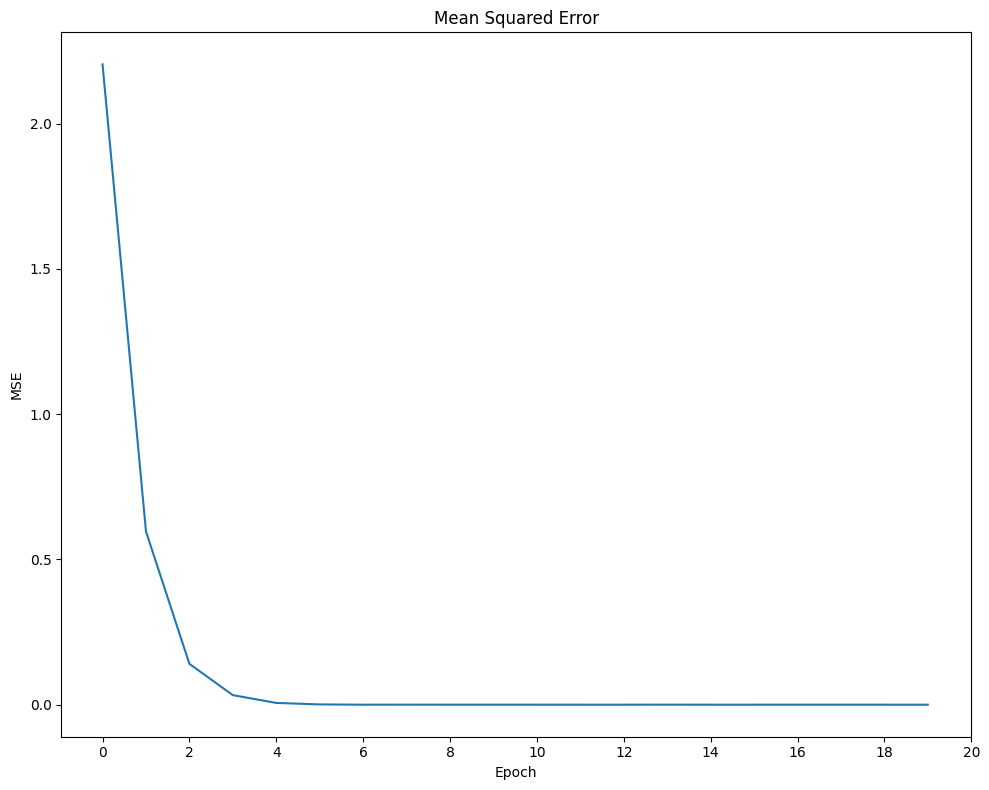

In [6]:
### Bathtub params:
A = 10.0      # cross-sectional area
C = A/100   # cross-sectional-drain area
H = 10.0      # initial height
g = 9.8     # gravitational constant

### ConSys params:
no_epochs = 20
timesteps_per_epoch = 30
learning_rate = 0.01
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
hidden_layers = [16, 16, 16]
activation_funcs = ["sigmoid", "sigmoid", "sigmoid", "linear"]
min_weight_value = - 1.0
max_weight_value = 1.0

controller = NeuralPidController(hidden_layers, activation_funcs, min_weight_value, max_weight_value)
plant = Bathtub(A, C, H, g)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list = consys.simulate(verbose=True)

plot_nn_pid(mse_list)


### Cournot

In [7]:
### CournoutCompetition params:
T = 0.6   # Target profit per timestep
c_m = 0.1   # Marginal cost
q1 = 0.1   # initial quantity produced by 1
q2 = 0.3   # initial quantity produced by 2
p_max = 2.0 # maximum market price

### ConSys params:
no_epochs = 50
timesteps_per_epoch = 10
learning_rate = 0.001
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
hidden_layers = [16, 16, 16]
activation_funcs = ["sigmoid", "sigmoid", "sigmoid", "linear"]
min_weight_value = - 0.01
max_weight_value = 0.01

controller = NeuralPidController(hidden_layers, activation_funcs, min_weight_value, max_weight_value)
plant = CournotCompetition(target_profit=T, marginal_unit_cost=c_m, own_quantity=q1, competitor_quantity=q2, maximum_price=p_max)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list = consys.simulate(verbose=True)

plot_nn_pid(mse_list)


Epoch 0  mse:  0.11269861
Epoch 1  mse:  0.060089212
Epoch 2  mse:  0.04718232
Epoch 3  mse:  0.04191587
Epoch 4  mse:  0.03583611
Epoch 5  mse:  0.032681566
Epoch 6  mse:  0.02941671
Epoch 7  mse:  0.028752506
Epoch 8  mse:  0.028014049
Epoch 9  mse:  0.026628539
Epoch 10  mse:  0.025490938
Epoch 11  mse:  0.024017528
Epoch 12  mse:  0.023138314
Epoch 13  mse:  0.02274958
Epoch 14  mse:  0.022121796
Epoch 15  mse:  0.022196734
Epoch 16  mse:  0.021255285
Epoch 17  mse:  0.020104855
Epoch 18  mse:  0.019899769


ValueError: All input arrays must have the same shape.

### Rabbits

In [5]:
### Rabbit population params:
a1 = 0.35     # rabbit birth rate
a2 = 0.01     # rabbit natural death rate
a3 = 0.05     # rabbit killed by fox rate
a4 = 0.3      # rabbit external birthrate factors param 1
a5 = 0.4      # rabbit external birthrate factors param 2
b1 = 0.3      # fox natural death rate
b2 = 0.015    # fox birthrate
rabbit_start_population = 26
fox_start_population = 3

### ConSys params:
no_epochs = 50
timesteps_per_epoch = 50
learning_rate = 0.0001
min_noise_value = -0.1
max_noise_value = 0.1

### Controller params:
hidden_layers = [16, 16, 16]
activation_funcs = ["sigmoid", "sigmoid", "sigmoid", "linear"]
min_weight_value = - 1.0
max_weight_value = 1.0

controller = NeuralPidController(hidden_layers, activation_funcs, min_weight_value, max_weight_value)
plant = Rabbits(a1, a2, a3, a4, a5, b1, b2, rabbit_start_population, fox_start_population)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list = consys.simulate(verbose=True)

plot_nn_pid(mse_list)


ValueError: All input arrays must have the same shape.